In [252]:
import keras

In [253]:
from keras import backend as K

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [254]:
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL.ImageOps import equalize as eq
import random
random.uniform(0.01, 1)

0.45607874213404065

In [255]:
import numpy as np
import random
from PIL.ImageOps import equalize as eq

def white (img):
    img=image.array_to_img (img)
    img= eq(img)
    return image.img_to_array (img)
    

In [256]:
def lap (img):
    img=image.array_to_img (img).convert('RGB') 
 
    open_cv_image = np.array(img) 
# Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    laplacian = cv2.Laplacian(open_cv_image,cv2.CV_64F)
    
    return laplacian

In [257]:
def aug (img):
    x=lap (img)
    
    return white(x)

In [258]:
from keras.layers import Activation ,Conv2D ,BatchNormalization , Dense ,Dropout ,Flatten ,MaxPool2D
from keras.models import Sequential

In [259]:
model = Sequential([
            BatchNormalization(axis=1, input_shape=(150,300,3)),
            Conv2D(32,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(32,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(64,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(64,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(256,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(256,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(1024, activation='relu'),
            BatchNormalization(),
            Dropout (0.4),
            Dense(1024, activation='relu'),
            BatchNormalization(),
            Dropout (0.4),
            Dense(1, activation='sigmoid')
        ])

In [260]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_31 (Batc (None, 150, 300, 3)       600       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 148, 298, 32)      896       
_________________________________________________________________
batch_normalization_32 (Batc (None, 148, 298, 32)      592       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 146, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 73, 148, 32)       0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 73, 148, 32)       292       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 71, 146, 64)       18496     
__________

In [261]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
gen=image.ImageDataGenerator(preprocessing_function=aug,rotation_range=15,shear_range=0.1 ,channel_shift_range=0.2 ,width_shift_range=0.4 , height_shift_range=0.25)
gen1=image.ImageDataGenerator(preprocessing_function=aug)
gen2=image.ImageDataGenerator( )

In [262]:
batch_size=30

train= gen.flow_from_directory('train6', target_size=(150,300),
                class_mode='binary', shuffle=True, batch_size=batch_size)

Found 2163 images belonging to 2 classes.


In [263]:
val= gen1.flow_from_directory('val', target_size=(150,300),
                class_mode='binary', shuffle=False, batch_size=batch_size)

Found 594 images belonging to 2 classes.


In [264]:
from keras.optimizers import Adam
model.compile(Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
model.load_weights ('newone19.h5')

In [265]:
batch_size=30
model.fit_generator(train, steps_per_epoch=2163  /batch_size, epochs=3, 
                            validation_data=val, validation_steps=594/batch_size)

Epoch 1/3
73/72 [==============================] - 93s - loss: 0.8160 - acc: 0.6050 - val_loss: 1.0401 - val_acc: 0.4949
Epoch 2/3
73/72 [==============================] - 86s - loss: 0.6932 - acc: 0.6854 - val_loss: 1.5497 - val_acc: 0.4949
Epoch 3/3
73/72 [==============================] - 92s - loss: 0.6338 - acc: 0.7118 - val_loss: 1.9551 - val_acc: 0.4949


In [266]:
model.optimizer.lr=0.1
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=3, 
                            validation_data=val, validation_steps=594/batch_size)

Epoch 1/3
80/79 [==============================] - 117s - loss: 0.5814 - acc: 0.7470 - val_loss: 1.6322 - val_acc: 0.4949
Epoch 2/3
80/79 [==============================] - 110s - loss: 0.5507 - acc: 0.7583 - val_loss: 0.8038 - val_acc: 0.6515
Epoch 3/3
80/79 [==============================] - 107s - loss: 0.5194 - acc: 0.7675 - val_loss: 0.4322 - val_acc: 0.8316


In [251]:
model.save_weights ('copy1.h5')

In [37]:
   
model.optimizer.lr=0.1
for i in range (1,10):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('newone{x}.h5'.format(x=i))

Epoch 1/5
160/159 [==============================] - 104s - loss: 0.4893 - acc: 0.7790 - val_loss: 0.4950 - val_acc: 0.8098
Epoch 2/5
160/159 [==============================] - 103s - loss: 0.4531 - acc: 0.7904 - val_loss: 1.9063 - val_acc: 0.4949
Epoch 3/5
160/159 [==============================] - 105s - loss: 0.4329 - acc: 0.8037 - val_loss: 0.8189 - val_acc: 0.5034
Epoch 4/5
160/159 [==============================] - 103s - loss: 0.4327 - acc: 0.7990 - val_loss: 0.6907 - val_acc: 0.5640
Epoch 5/5
160/159 [==============================] - 103s - loss: 0.4509 - acc: 0.7944 - val_loss: 1.0309 - val_acc: 0.4933
Epoch 1/5
160/159 [==============================] - 104s - loss: 0.4221 - acc: 0.7958 - val_loss: 1.2439 - val_acc: 0.4899
Epoch 2/5
160/159 [==============================] - 104s - loss: 0.4106 - acc: 0.8165 - val_loss: 2.4053 - val_acc: 0.4949
Epoch 3/5
160/159 [==============================] - 104s - loss: 0.3940 - acc: 0.8254 - val_loss: 0.5830 - val_acc: 0.6212
Epoch 4/

In [38]:
model.optimizer.lr=0.001
for i in range (10,20):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('newone{x}.h5'.format(x=i))

Epoch 1/5
160/159 [==============================] - 104s - loss: 0.2980 - acc: 0.8654 - val_loss: 2.0621 - val_acc: 0.4949
Epoch 2/5
160/159 [==============================] - 103s - loss: 0.2828 - acc: 0.8804 - val_loss: 1.1159 - val_acc: 0.5034
Epoch 3/5
160/159 [==============================] - 104s - loss: 0.2606 - acc: 0.8831 - val_loss: 1.5227 - val_acc: 0.4966
Epoch 4/5
160/159 [==============================] - 103s - loss: 0.2975 - acc: 0.8673 - val_loss: 0.7229 - val_acc: 0.5488
Epoch 5/5
160/159 [==============================] - 104s - loss: 0.2831 - acc: 0.8748 - val_loss: 1.3494 - val_acc: 0.4949
Epoch 1/5
160/159 [==============================] - 104s - loss: 0.2866 - acc: 0.8802 - val_loss: 1.8559 - val_acc: 0.4949
Epoch 2/5
160/159 [==============================] - 103s - loss: 0.3546 - acc: 0.8390 - val_loss: 2.0334 - val_acc: 0.4949
Epoch 3/5
160/159 [==============================] - 104s - loss: 0.3766 - acc: 0.8356 - val_loss: 1.8033 - val_acc: 0.4933
Epoch 4/

In [ ]:
model.optimizer.lr=0.01
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.optimizer.lr=0.001
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
   
model.optimizer.lr=0.1
for i in range (4,9):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('new{x}.h5'.format(x=i))

In [ ]:
model.optimizer.lr=0.001
for i in range (9,15):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('new{x}.h5'.format(x=i))

In [68]:
model.load_weights ('newone5.h5')

In [267]:
test = gen1.flow_from_directory('newtest', target_size=(150,300),
                class_mode='binary', shuffle=False, batch_size=1 )

Found 115 images belonging to 2 classes.


In [268]:
pre=model.predict_generator(test,115)

In [269]:
test.class_indices

{'clean': 0, 'distress': 1}

In [270]:
files = test.filenames

In [272]:
mistake=0
doubt=0
file=[]
file1=[]
correct=0
num=0
for x in pre :
    
    if x[0]<0.8 and x[0]>0.2: 
        doubt+=1
        print (x , "doubt")
        file1.append (files[num])
    else:
        if num<0:
            if x[0]>0.8: 
                mistake+=1
                print (x,num)
                file.append (files[num])
            else : correct+=1
        else:
            if x[0]<0.8: 
                mistake+=1
                print (x,num) 
                file.append (files[num])
            else : correct+=1
    num+=1
    
all=correct+mistake

[ 0.24192801] doubt
[ 0.02085267] 1
[ 0.00882423] 2
[ 0.13399173] 3
[ 0.12590782] 4
[ 0.09077263] 5
[ 0.02771022] 6
[ 0.03400287] 7
[ 0.0917167] 8
[ 0.00412688] 9
[ 0.05244307] 10
[ 0.04150217] 11
[ 0.04254949] 12
[ 0.00030941] 13
[ 0.00316199] 14
[ 0.11572501] 15
[ 0.07456685] 16
[ 0.07989266] 17
[ 0.01874471] 18
[ 0.1839979] 19
[ 0.0222244] 20
[ 0.08704611] 21
[ 0.01248585] 22
[ 0.12132277] 23
[ 0.27577415] doubt
[ 0.08366439] 25
[ 0.03190674] 26
[ 0.05128324] 27
[ 0.12961239] 28
[ 0.04684086] 29
[ 0.02402548] 30
[ 0.03141646] 31
[ 0.01328431] 32
[ 0.05824838] 33
[ 0.02996856] 34
[ 0.01408683] 35
[ 0.07440628] 36
[ 0.10373766] 37
[ 0.321996] doubt
[ 0.0658816] 39
[ 0.0094903] 40
[ 0.08717947] 41
[ 0.04186454] 42
[ 0.09120454] 43
[ 0.20980172] doubt
[ 0.14614506] 45
[ 0.02185182] 46
[ 0.0479296] 47
[ 0.12796518] 48
[ 0.34408861] doubt
[ 0.07450885] 50
[ 0.03868754] 52
[ 0.34515747] doubt
[ 0.06006549] 54
[ 0.05479652] 55
[ 0.64703411] doubt
[ 0.0299173] 57
[ 0.00077807] 58
[ 0.0039448

In [273]:
correct/all


0.009708737864077669

In [243]:
doubt/(all+doubt)

0.3739130434782609

In [244]:
mistake

0

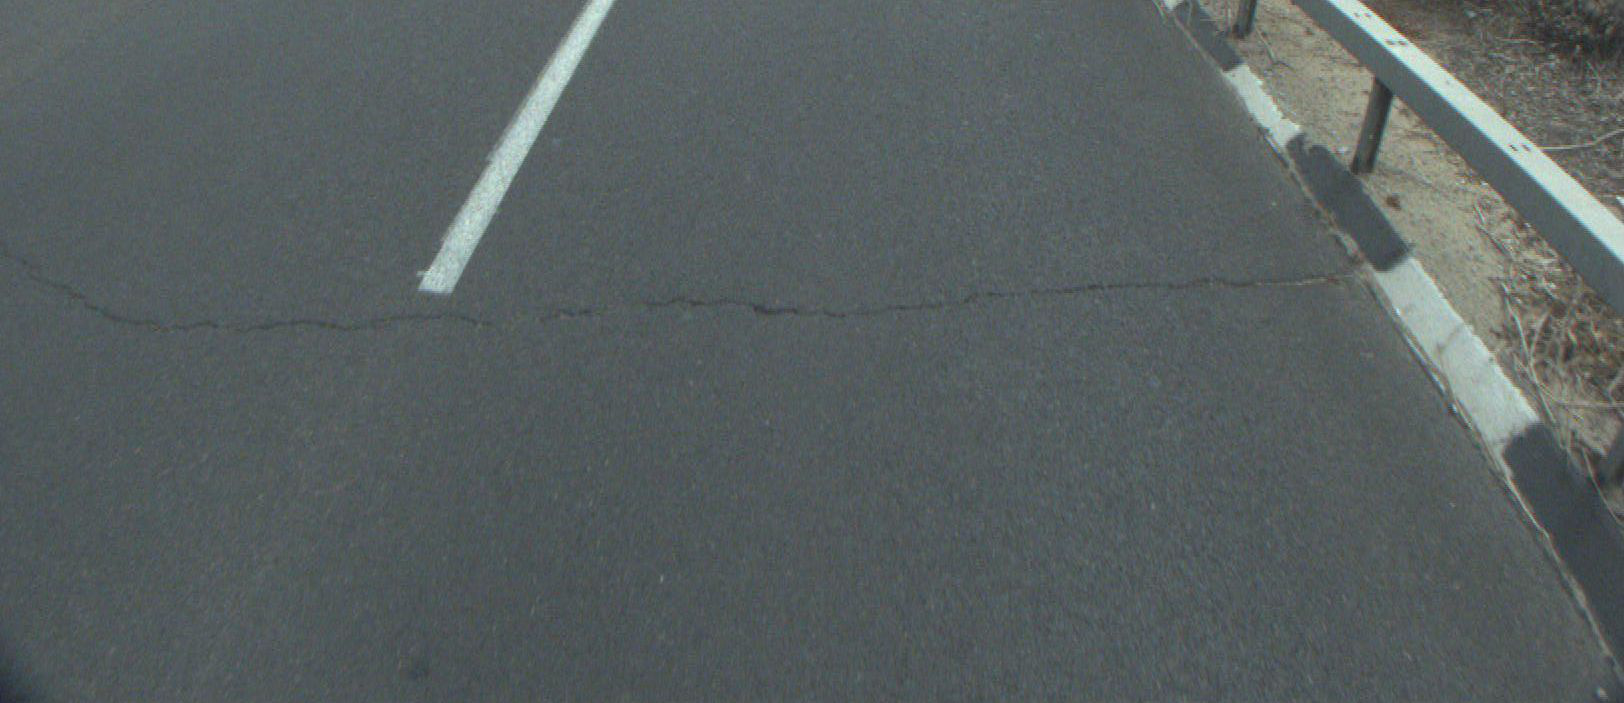

In [188]:
image.load_img ('newtest/'+files[10])

In [143]:
test = gen1.flow_from_directory('newtest', target_size=(150,300),
                class_mode=None, shuffle=False, batch_size=1 )

Found 115 images belonging to 2 classes.


In [144]:
import numpy as np
test1=np.concatenate([test.next() for i in range(test.samples)])

In [145]:
i=0

In [146]:
x=test1[i]

In [147]:
l=image.array_to_img (x)

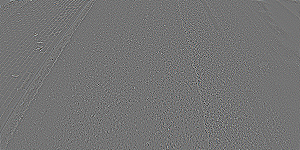

In [148]:
l

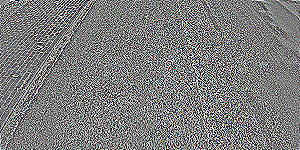

In [149]:
eq(l)

In [16]:
import PIL

In [17]:
from PIL.ImageOps import equalize as eq

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread (l)
laplacian = cv2.Laplacian(open_cv_image,cv2.CV_64F)

TypeError: bad argument type for built-in operation

In [30]:
laplacian = cv2.Laplacian(open_cv_image,cv2.CV_64F)

In [29]:
open_cv_image =open_cv_image[:, :, ::-1].copy()

In [28]:
open_cv_image = np.array(a) 

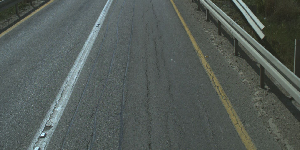

In [24]:
l.convert('RGB') 

In [25]:
a=l.convert('RGB') 

In [31]:
laplacian

array([[[ 174.,  128.,  110.],
        [ 140.,  119.,  108.],
        [-208., -198., -186.],
        ..., 
        [  -5.,   -4.,   -8.],
        [  -2.,   -2.,   -2.],
        [  12.,   12.,   12.]],

       [[-194., -199., -197.],
        [ -69.,  -48.,  -42.],
        [  77.,   73.,   73.],
        ..., 
        [ -17.,  -18.,  -20.],
        [  17.,   15.,   15.],
        [  -7.,   -9.,   -9.]],

       [[  54.,   69.,   73.],
        [  19.,   31.,   40.],
        [  10.,    3.,   -3.],
        ..., 
        [  25.,   24.,   25.],
        [   3.,    2.,    3.],
        [  10.,    9.,   10.]],

       ..., 
       [[ -20.,  -21.,  -23.],
        [  15.,    9.,    6.],
        [ -19.,  -30.,  -21.],
        ..., 
        [  16.,   20.,   21.],
        [ -41.,  -39.,  -39.],
        [  17.,   19.,   19.]],

       [[ -30.,  -43.,  -39.],
        [   2.,   12.,   17.],
        [ -11.,    3.,  -18.],
        ..., 
        [  18.,   14.,   14.],
        [ -13.,  -15.,  -15.],
        [ 